In [31]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import ast

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [32]:
# https://query.data.world/s/4ef72eiwz6rzc546jfympbna6aftek
movie_meta = pd.read_csv('https://query.data.world/s/7efiji5tf4ft2pr4nry676qtruw3rg', low_memory = False)
movie_meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [33]:
movie_meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [34]:
movie_meta.shape

(45466, 24)

In [35]:
movie_meta = movie_meta.set_index('title', drop = True)

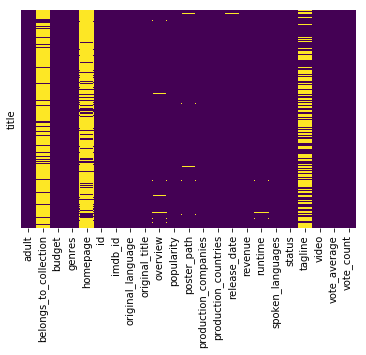

In [36]:
sns.heatmap(movie_meta.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [37]:
movie_meta = movie_meta.dropna(thresh = 5)

In [38]:
movie_meta = movie_meta.drop(['homepage', 'imdb_id', 'original_title', 'overview', 'popularity', 'poster_path', 'status', 'tagline', 'video'],
               axis = 1)

In [39]:
movie_meta['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [40]:
movie_meta.loc[(movie_meta['adult'] != 'True') & (movie_meta['adult'] != 'False'), 'adult'] = False

In [41]:
movie_meta['adult'] = movie_meta['adult'].map({'True': True, 'False': False})

In [42]:
movie_meta['belongs_to_collection'] = movie_meta['belongs_to_collection'].notna()

In [43]:
movie_meta[movie_meta['budget'] == '0']['budget'].count()

36573

In [44]:
movie_meta[movie_meta['revenue'] == 0]['revenue'].count()

38052

In [45]:
movie_meta['budget'] = pd.to_numeric(movie_meta['budget'], errors = 'coerce')
# revenue is already a float
movie_meta.loc[(movie_meta['budget'] == 0) & (movie_meta['revenue'] == 0), 'revenue'] = np.nan
movie_meta.loc[movie_meta['budget'] == 0, 'budget'] = np.nan

In [46]:
movie_meta[movie_meta['budget'] < 100]['budget'].count()

138

In [47]:
def scale(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 1000
    else:
        return num

In [48]:
movie_meta[['budget', 'revenue']] = movie_meta[['budget', 'revenue']].applymap(scale)

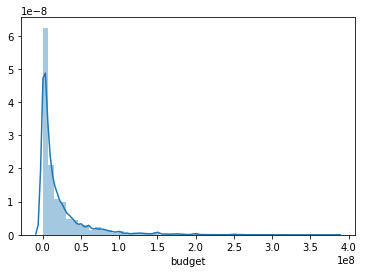

In [49]:
sns.distplot(movie_meta[movie_meta['budget'].notnull()]['budget'])

In [50]:
def get_values(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data_str = ast.literal_eval(data_str)
        if isinstance(data_str, list):
            for k_v in data_str:
                values.append(k_v['name'])
            return values
        else:
            return None

In [51]:
movie_meta[['genres', 'production_companies', 'production_countries', 'spoken_languages']] = movie_meta[['genres', 'production_companies', 'production_countries', 'spoken_languages']].applymap(get_values)

In [52]:
movie_meta['release_date'] = pd.to_datetime(movie_meta['release_date'], format = '%Y-%m-%d', errors='coerce')

In [53]:
movie_meta.head()

,adult,belongs_to_collection,budget,genres,id,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
title,,,,,,,,,,,,,,
Toy Story,False,True,30000000.0,"[Animation, Comedy, Family]",862,en,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],7.7,5415.0
Jumanji,False,False,65000000.0,"[Adventure, Fantasy, Family]",8844,en,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",6.9,2413.0
Grumpier Old Men,False,True,NaN,"[Romance, Comedy]",15602,en,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,[English],6.5,92.0
Waiting to Exhale,False,False,16000000.0,"[Comedy, Drama, Romance]",31357,en,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],6.1,34.0
Father of the Bride Part II,False,True,NaN,[Comedy],11862,en,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],5.7,173.0


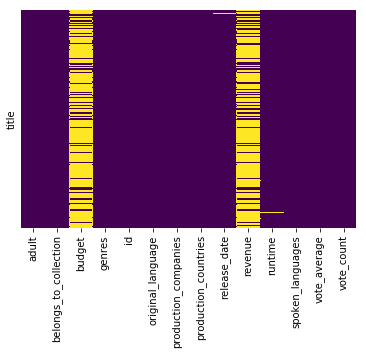

In [54]:
sns.heatmap(movie_meta.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [55]:
movie_meta['profit'] = movie_meta['revenue'] - movie_meta['budget']


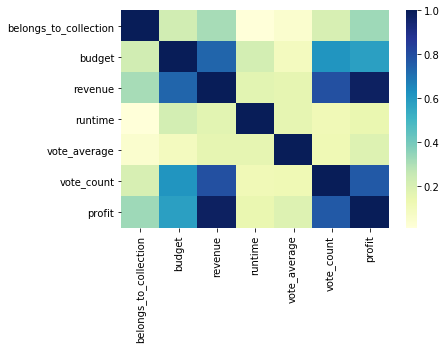

In [56]:
sns.heatmap(movie_meta.corr(), cmap = 'YlGnBu')

In [57]:
def counting_values(df, column):
    value_count = {}
    for row in df[column].dropna():
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

In [58]:
countries = pd.Series(counting_values(movie_meta, 'production_countries'))

#the map didn't come out so interesting in a regular scale, so I changed it to a logarithmic one:
ln_countries = pd.Series(np.log(countries.values), index = countries.index)

In [63]:
data = dict(type = 'choropleth',
           locations = ln_countries.index,
           locationmode = 'country names',
           colorscale = 'Blackbody',
           text = countries.values,
           z = ln_countries.values,
           colorbar = {'title': 'log of Sum of Movies'})

layout = dict(title = 'Movies Filmed in Countries around the World',
             geo = dict(showframe = False,
                       projection = {'type': 'natural earth'}))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

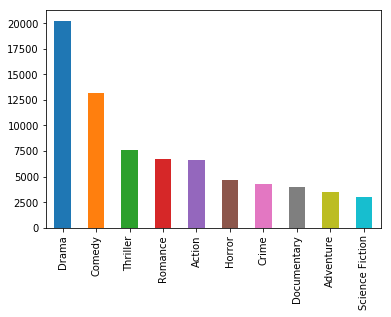

In [60]:
genres_count = pd.Series(counting_values(movie_meta, 'genres'))
genres_count.sort_values(ascending = False).head(10).plot(kind = 'bar')

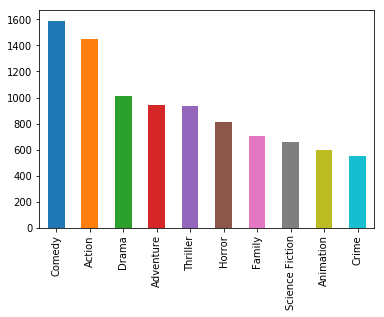

In [126]:
genres_count = pd.Series(counting_values(movie_meta[movie_meta['belongs_to_collection'] == True], 'genres'))
genres_count.sort_values(ascending = False).head(10).plot(kind = 'bar')

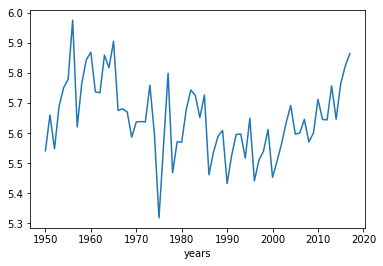

In [127]:
movie_meta['years'] = movie_meta['release_date'].apply(lambda x: x.year)

movie_meta[(movie_meta['years'] < 2018) & (movie_meta['years'] >= 1950)].groupby(by = 'years').mean()['vote_average'].plot()